<a href="https://colab.research.google.com/github/RenataTNT/ML_in_Production/blob/master/ML_in_biz_lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Прочитайте базу COVID-19 и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=3 по образцу из примера для обработки ряда "цена Нефти" .

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [0]:
covid_data=pd.read_csv('covid_19_data.csv')

In [3]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid_data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
14166,14167,04/11/2020,Wyoming,US,2020-04-11 22:52:46,261.0,0.0,0.0
14167,14168,04/11/2020,Xinjiang,Mainland China,2020-04-11 22:52:46,76.0,3.0,73.0
14168,14169,04/11/2020,Yukon,Canada,2020-04-11 22:52:46,8.0,0.0,0.0
14169,14170,04/11/2020,Yunnan,Mainland China,2020-04-11 22:52:46,184.0,2.0,174.0
14170,14171,04/11/2020,Zhejiang,Mainland China,2020-04-11 22:52:46,1267.0,1.0,1236.0


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14171 entries, 0 to 14170
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              14171 non-null  int64  
 1   ObservationDate  14171 non-null  object 
 2   Province/State   7247 non-null   object 
 3   Country/Region   14171 non-null  object 
 4   Last Update      14171 non-null  object 
 5   Confirmed        14171 non-null  float64
 6   Deaths           14171 non-null  float64
 7   Recovered        14171 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 885.8+ KB


In [6]:
covid_data.loc[covid_data['Country/Region']=='Russia']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
482,483,01/31/2020,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0
540,541,02/01/2020,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0
610,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
677,678,02/03/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
745,746,02/04/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12703,12704,04/07/2020,NaN,Russia,2020-04-07 23:11:31,7497.0,58.0,494.0
13023,13024,04/08/2020,NaN,Russia,2020-04-08 22:59:00,8672.0,63.0,580.0
13343,13344,04/09/2020,NaN,Russia,2020-04-09 23:09:19,10131.0,76.0,698.0
13663,13664,04/10/2020,NaN,Russia,2020-04-10 23:01:43,11917.0,94.0,795.0


Видно, что данные изо дня в день отражаются нарастающим итогом, поэтому определим количество заражений по странам на последний день наблюдений

In [7]:
covid_all_countries=covid_data.loc[covid_data['ObservationDate']=='04/09/2020'].groupby('Country/Region')['Confirmed'].sum()
covid_all_countries.sort_values(ascending=False).head(30)

Country/Region
US                461437.0
Spain             153222.0
Italy             143626.0
France            118781.0
Germany           118181.0
Mainland China     81865.0
Iran               66220.0
UK                 65872.0
Turkey             42282.0
Belgium            24983.0
Switzerland        24051.0
Netherlands        21903.0
Canada             20654.0
Brazil             18092.0
Portugal           13956.0
Austria            13244.0
South Korea        10423.0
Russia             10131.0
Israel              9968.0
Sweden              9141.0
India               6725.0
Ireland             6574.0
Norway              6211.0
Australia           6108.0
Chile               5972.0
Denmark             5830.0
Poland              5575.0
Czech Republic      5569.0
Peru                5256.0
Romania             5202.0
Name: Confirmed, dtype: float64

Подсчитаем количество дней наблюдений по странам

In [8]:
Covid_oldest_cases=covid_data[['Country/Region','ObservationDate']].drop_duplicates().groupby('Country/Region').count()
Covid_oldest_cases.sort_values(by='ObservationDate', ascending=False).head(30)

,ObservationDate
Country/Region,
Japan,81
South Korea,81
US,81
Taiwan,81
Macau,81
Mainland China,81
Thailand,81
Hong Kong,81
Vietnam,80


На эот раз выберем **Францию** для анализа

In [9]:
COVID = covid_data.copy()

COVID['Date']= pd.to_datetime(COVID['ObservationDate']).dt.date
COVID.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [10]:
France=COVID.loc[COVID['Country/Region']=='France']
France_covid=France.set_index(pd.DatetimeIndex(France['Date'].values))
France_covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2020-04-11,14111,04/11/2020,New Caledonia,France,2020-04-11 22:52:46,18.0,0.0,1.0,2020-04-11
2020-04-11,14137,04/11/2020,Reunion,France,2020-04-11 22:52:46,388.0,0.0,40.0,2020-04-11
2020-04-11,14139,04/11/2020,Saint Barthelemy,France,2020-04-11 22:52:46,6.0,0.0,1.0,2020-04-11
2020-04-11,14140,04/11/2020,Saint Pierre and Miquelon,France,2020-04-11 22:52:46,1.0,0.0,0.0,2020-04-11
2020-04-11,14151,04/11/2020,St Martin,France,2020-04-11 22:52:46,32.0,2.0,11.0,2020-04-11


In [0]:
#France_covid=France_covid.drop(['SNo', 'Province/State'] , axis=1)


In [0]:
France_covid=France_covid.groupby('Date').sum()

In [12]:
France_covid=France_covid.drop('SNo', axis=1)
France_covid.tail()

,Confirmed,Deaths,Recovered
Date,,,
2020-04-07,110065.0,10343.0,19523.0
2020-04-08,113959.0,10887.0,21452.0
2020-04-09,118781.0,12228.0,23413.0
2020-04-10,125931.0,13215.0,25195.0
2020-04-11,130727.0,13851.0,26663.0


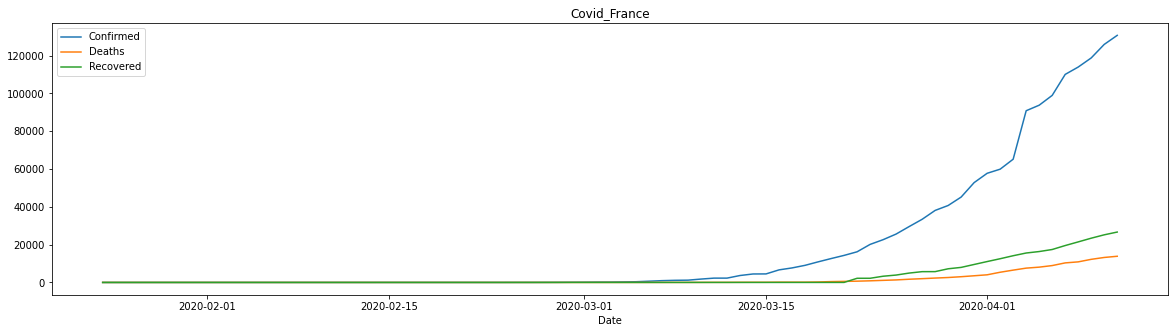

In [13]:
France_covid.plot(figsize=(20,5), title='Covid_France')


Будем анализировать не нарастающие итоги заболеваний, а дневные приросты

In [14]:
France_covid['Confirmed_daily']=France_covid['Confirmed']
France_covid['Confirmed_daily'].iloc[1:]=France_covid['Confirmed'].iloc[1:].values-France_covid['Confirmed'].iloc[:-1].values
France_covid

,Confirmed,Deaths,Recovered,Confirmed_daily
Date,,,,
2020-01-24,2.0,0.0,0.0,2.0
2020-01-25,3.0,0.0,0.0,1.0
2020-01-26,3.0,0.0,0.0,0.0
2020-01-27,3.0,0.0,0.0,0.0
2020-01-28,4.0,0.0,0.0,1.0
...,...,...,...,...
2020-04-07,110065.0,10343.0,19523.0,11102.0
2020-04-08,113959.0,10887.0,21452.0,3894.0
2020-04-09,118781.0,12228.0,23413.0,4822.0


In [0]:
# функция для экспоненциального сглаживания
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [0]:
# сгладим подтвержденные случаи
Confirmed_exp=exponential_smoothing(France_covid['Confirmed_daily'], 0.2)


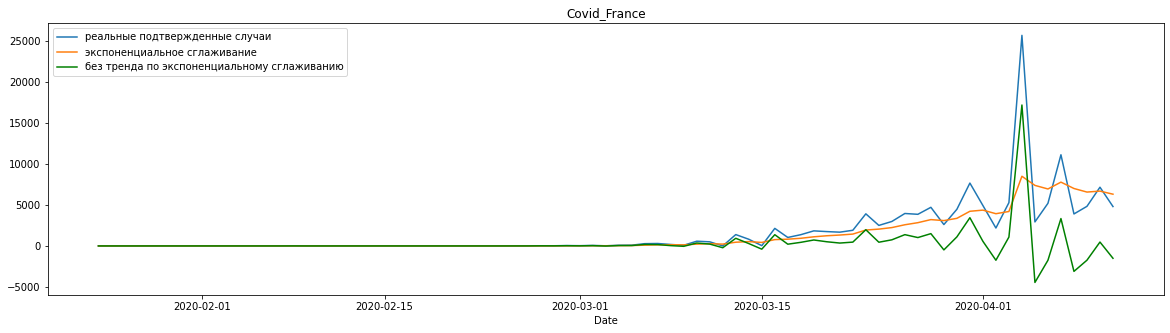

In [17]:
plt.figure(figsize=(20,5))
France_covid['Confirmed_daily'].plot(title='Covid_France', label='реальные подтвержденные случаи')
plt.plot(France_covid.index,Confirmed_exp, label='экспоненциальное сглаживание')
plt.plot(France_covid.index,France_covid['Confirmed_daily'] - Confirmed_exp, color = 'green', label="без тренда по экспоненциальному сглаживанию")
plt.legend()

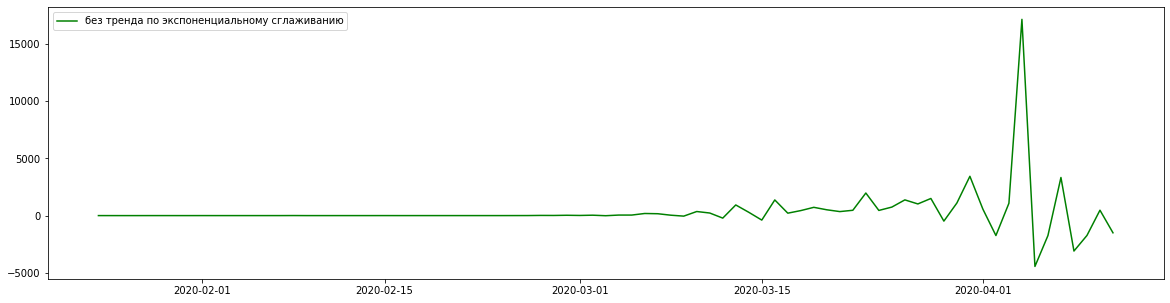

In [18]:
plt.figure(figsize=(20,5))
plt.plot(France_covid.index,France_covid['Confirmed_daily'] - Confirmed_exp, color = 'green', label="без тренда по экспоненциальному сглаживанию")

plt.legend()

Проверим даты выбросов

In [19]:
France_covid_trend_free=France_covid['Confirmed_daily'] - Confirmed_exp
France_covid_trend_free.loc[France_covid_trend_free==max(France_covid_trend_free)]


Date
2020-04-04    17161.494119
Name: Confirmed_daily, dtype: float64

In [20]:
France_covid_trend_free.index.get_loc(pd.to_datetime('2020-04-04').date())

71

Немного сгладим выброс в исходном ряду и ряду Confirmed_exp, как среднее соседних пиков. Эту дату будем использовать только в тренировочной выборке

In [21]:
France_covid['Confirmed_daily'][71]

25646.0

In [22]:
France_covid['Confirmed_daily'][67:80]

Date
2020-03-31     7657.0
2020-04-01     4922.0
2020-04-02     2180.0
2020-04-03     5273.0
2020-04-04    25646.0
2020-04-05     2925.0
2020-04-06     5190.0
2020-04-07    11102.0
2020-04-08     3894.0
2020-04-09     4822.0
2020-04-10     7150.0
2020-04-11     4796.0
Name: Confirmed_daily, dtype: float64

In [23]:
France_covid['Confirmed_daily'][71]=np.mean([France_covid['Confirmed_daily'][67],France_covid['Confirmed_daily'][74]])
France_covid['Confirmed_daily'][71]

9379.5

In [24]:
France_covid['Confirmed_daily'][67:80]

Date
2020-03-31     7657.0
2020-04-01     4922.0
2020-04-02     2180.0
2020-04-03     5273.0
2020-04-04     9379.5
2020-04-05     2925.0
2020-04-06     5190.0
2020-04-07    11102.0
2020-04-08     3894.0
2020-04-09     4822.0
2020-04-10     7150.0
2020-04-11     4796.0
Name: Confirmed_daily, dtype: float64

In [25]:
Confirmed_exp[71]=np.mean([Confirmed_exp[67],Confirmed_exp[74]])
Confirmed_exp[71]

5994.708067959313

In [0]:
France_covid_trend_free=France_covid['Confirmed_daily'] - Confirmed_exp

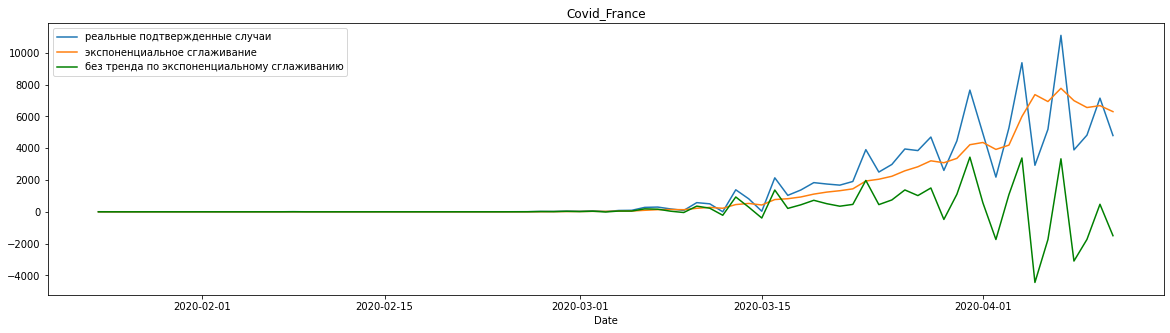

In [27]:
plt.figure(figsize=(20,5))
France_covid['Confirmed_daily'].plot(title='Covid_France', label='реальные подтвержденные случаи')
plt.plot(France_covid.index,Confirmed_exp, label='экспоненциальное сглаживание')
plt.plot(France_covid_trend_free, color = 'green', label="без тренда по экспоненциальному сглаживанию")
plt.legend()

Построим датасет для прогноза

In [28]:
df= pd.DataFrame(Confirmed_exp)
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.05)
df['exp_0_03'] = exponential_smoothing(df[0], 0.09)
df['exp_0_08'] = exponential_smoothing(df[0], 0.5)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[1:,0].values-df.iloc[:-1,0].values

# добавим относительную разницу между соседними значениями
df['diff2'] = 0
df['diff2'].iloc[1:] = df.iloc[1:,0].values/df.iloc[:-1,0].values



df.index=France_covid.index


df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1,diff2
Date,,,,,,,,,
2020-01-24,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000
2020-01-25,1.800000,2.000000,0.000000,0.000000,1.990000,1.982000,1.900000,-0.200000,0.900000
2020-01-26,1.440000,1.800000,2.000000,0.000000,1.962500,1.933220,1.670000,-0.360000,0.800000
2020-01-27,1.152000,1.440000,1.800000,2.000000,1.921975,1.862910,1.411000,-0.288000,0.800000
2020-01-28,1.121600,1.152000,1.440000,1.800000,1.881956,1.796192,1.266300,-0.030400,0.973611
...,...,...,...,...,...,...,...,...,...
2020-04-07,7769.267011,6936.083764,7372.604705,5994.708068,2729.258887,3953.639412,7170.234442,833.183247,1.120123
2020-04-08,6994.213609,7769.267011,6936.083764,7372.604705,2942.506623,4227.291090,7082.224025,-775.053402,0.900241
2020-04-09,6559.770887,6994.213609,7769.267011,6936.083764,3123.369836,4437.214272,6820.997456,-434.442722,0.937885


Построим модель градиентного бустинга

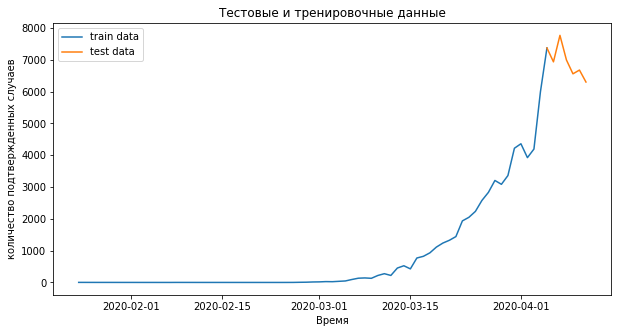

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >=  split_date].copy()

train_b, test_b = split_data_b( df, pd.to_datetime('2020-04-05').date())

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 10, 5 ))
plt.xlabel('Время')
plt.ylabel('количество подтвержденных случаев')
plt.plot(train_b.index.get_level_values('Date'),train_b[df.columns[0]], label='train data')

plt.plot(test_b.index.get_level_values('Date'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [30]:
X_test_b

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1,diff2
Date,,,,,,,,,
2020-04-05,7372.604705,5994.708068,4194.132352,3924.415440,2228.622224,3243.980342,6206.319980,1377.896637,1.229852
2020-04-06,6936.083764,7372.604705,5994.708068,4194.132352,2463.995301,3576.269650,6571.201872,-436.520941,0.940791
2020-04-07,7769.267011,6936.083764,7372.604705,5994.708068,2729.258887,3953.639412,7170.234442,833.183247,1.120123
2020-04-08,6994.213609,7769.267011,6936.083764,7372.604705,2942.506623,4227.291090,7082.224025,-775.053402,0.900241
2020-04-09,6559.770887,6994.213609,7769.267011,6936.083764,3123.369836,4437.214272,6820.997456,-434.442722,0.937885
2020-04-10,6677.816710,6559.770887,6994.213609,7769.267011,3301.092180,4638.868491,6749.407083,118.045823,1.017995


In [31]:
y_test_b

array([6936.08376412, 7769.2670113 , 6994.21360904, 6559.77088723,
       6677.81670979, 6301.45336783])

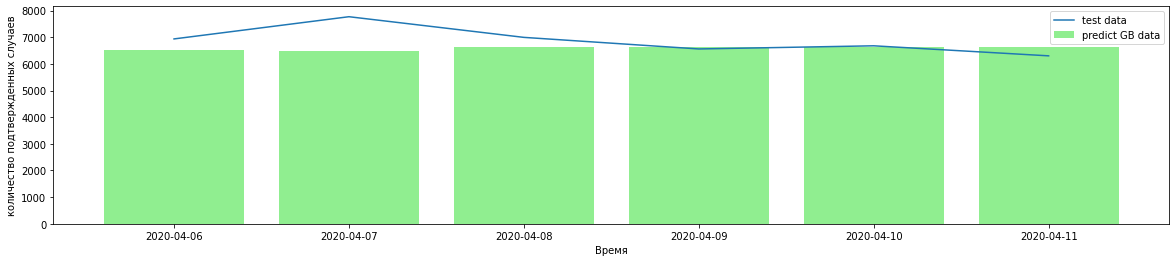

ошибка градиентного бустинга :   5.768429247041148 %


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=42, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('количество подтвержденных случаев')
plt.bar(test_b.index[1:],X_test_pred_gb, label='predict GB data', color='lightgreen')
plt.plot(test_b.index[1:],y_test_b, label='test data')


plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

In [33]:
y_test_b, X_test_pred_gb

(array([6936.08376412, 7769.2670113 , 6994.21360904, 6559.77088723,
        6677.81670979, 6301.45336783]),
 array([6527.89219616, 6486.83200608, 6636.07401975, 6636.07401975,
        6636.07401975, 6636.07401975]))

3 дня

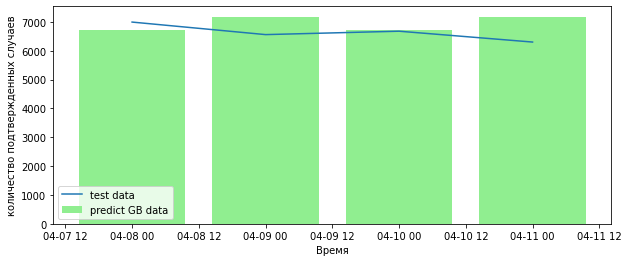

ошибка градиентного бустинга :   6.987835561373962 %


In [34]:
h=3

X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]


model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=(10, 4 ))

plt.xlabel('Время')
plt.ylabel('количество подтвержденных случаев')
plt.bar(test_b.index[h:],X_test_pred_gb, label='predict GB data', color='lightgreen')
plt.plot(test_b.index[h:],y_test_b, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')


3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

**С ростом h ошибка прогноза увеличивается**

4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :). **- ряд нестационарный, с сезоном (времена года) и циклом (годовой цикл)**

б) Количество денег, которые тратят покупатели в интернет магазине.- **- ряд нестационарный, с сезоном (праздники) и циклом (годовые циклы), а также может имется растущий тренд с ростом инфляции**

в) Вес растущего котенка. - - **- ряд нестационарный, с растущим трендом**

г) Прирост объема деревьев в лесу от времени - - **- ряд нестационарный, с сезоном (максимальные значения прироста наблюдается весной-летом) и циклом (годовые циклы)**